In [3]:
#import modules
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD,RMSprop,Adam
from keras.utils import np_utils
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import os
import theano
import glob
from PIL import Image
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
from numpy import *
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from keras import backend as K
import tensorflow as tf

## CNN Model with Gray Images

### Basic Model

In [2]:
# store path 
path1 = '/Users/yutongwang/Desktop/dogs-vs-cats/cat_dog'
path2 = '/Users/yutongwang/Desktop/dogs-vs-cats/resize'

In [3]:
#number of images that we have
listing = os.listdir(path1)
num_img=size(listing)
print(num_img)

2001


In [4]:
#resize and store the gray pictures in the file resize
for file in listing:
    image_Path = path1 + '/' + file
    if image_Path == path1 + '/' + '.DS_Store':
        continue
    im = Image.open(image_Path)  
    img = im.resize((200,200))
    gray = img.convert('L')
                #need to do some more processing here          
    gray.save(path2 +'/' +  file, "JPEG")

In [5]:
#list of processed data
imlist = os.listdir(path2)
imlist = sorted(imlist)

In [6]:
# open one image to get size
im1 = array(Image.open('/Users/yutongwang/Desktop/dogs-vs-cats/resize' + '/'+ imlist[0])) 
m,n = im1.shape[0:2] # get the size of the images
imnbr = len(imlist) # get the number of images
print(m,n)

200 200


In [7]:
# create matrix to store all flattened images
immatrix = array([array(Image.open('/Users/yutongwang/Desktop/dogs-vs-cats/resize'+ '/' + im2)).flatten()
              for im2 in imlist],'f')
immatrix.shape

(2000, 40000)

In [17]:
label = np.ones((2000,),dtype = int)
label[0:1000]=0

In [22]:
data,Label = shuffle(immatrix,label, random_state=2)
train_data = [data,label]

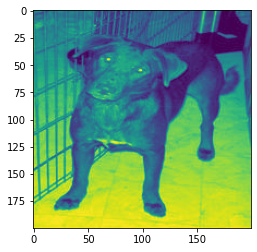

In [23]:
img=immatrix[1000].reshape(200,200)
plt.imshow(img)

In [24]:
label[1000]

1

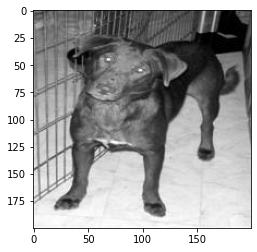

In [25]:
plt.imshow(img,cmap='gray')

In [36]:
#split train & test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)


X_train = X_train.reshape(X_train.shape[0], 200, 200, 1)
X_test = X_test.reshape(X_test.shape[0], 200, 200, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (1600, 200, 200, 1)
1600 train samples
400 test samples


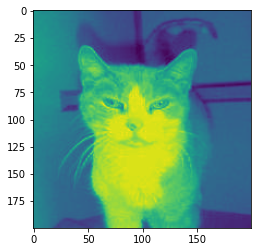

In [37]:
input_image=X_train[0:1,:,:,:]
plt.imshow(input_image[0,:,:,0])
# cmap ='gray'
plt.imshow(input_image[0,:,:,0])

In [38]:
# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

### Four_conv CNN

In [45]:
model_1 = Sequential()
model_1.add(Convolution2D(32, (3, 3), padding='same'))
model_1.add(Activation('relu'))
model_1.add(Convolution2D(32, (3, 3)))
model_1.add(Activation('relu'))
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(Dropout(0.1))

model_1.add(Convolution2D(64, (3, 3), padding='same'))
model_1.add(Activation('relu'))
model_1.add(Convolution2D(64, (3, 3)))
model_1.add(Activation('relu'))
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(Dropout(0.1))

model_1.add(Flatten())
model_1.add(Dense(512))
model_1.add(Activation('relu'))
model_1.add(Dropout(0.2))
model_1.add(Dense(2))
model_1.add(Activation('softmax'))
opt = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

/Users/yutongwang/opt/anaconda3/envs/tensorflow/lib/python3.6/site-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [46]:
model_1.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [48]:
hist = model_1.fit(X_train, Y_train, batch_size=batch_size, epochs=30)

Epoch 1/30
50/50 [==============================] - 90s 2s/step - loss: 0.6943 - accuracy: 0.4781
Epoch 2/30
50/50 [==============================] - 93s 2s/step - loss: 0.6936 - accuracy: 0.5050
Epoch 3/30
50/50 [==============================] - 96s 2s/step - loss: 0.6933 - accuracy: 0.5156
Epoch 4/30
50/50 [==============================] - 87s 2s/step - loss: 0.6937 - accuracy: 0.5013
Epoch 5/30
50/50 [==============================] - 92s 2s/step - loss: 0.6942 - accuracy: 0.4881
Epoch 6/30
50/50 [==============================] - 93s 2s/step - loss: 0.6938 - accuracy: 0.5025
Epoch 7/30
50/50 [==============================] - 86s 2s/step - loss: 0.6928 - accuracy: 0.5206
Epoch 8/30
50/50 [==============================] - 102s 2s/step - loss: 0.6936 - accuracy: 0.5044
Epoch 9/30
50/50 [==============================] - 98s 2s/step - loss: 0.6920 - accuracy: 0.5200
Epoch 10/30
50/50 [==============================] - 107s 2s/step - loss: 0.6916 - accuracy: 0.5263
Epoch 11/30
50/50

In [73]:
Y_pred = model_1.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)
target_names = ['class 0 (cat)', 'class 1 (dog)']
print(classification_report(np.argmax(Y_test,axis=1), y_pred,target_names=target_names))

               precision    recall  f1-score   support

class 0 (cat)       0.50      0.45      0.47       204
class 1 (dog)       0.48      0.54      0.51       196

     accuracy                           0.49       400
    macro avg       0.49      0.49      0.49       400
 weighted avg       0.49      0.49      0.49       400



### Six_conv CNN

In [69]:
model_2 = Sequential()
model_2.add(Convolution2D(32, (3, 3), padding='same'))
model_2.add(Activation('relu'))
model_2.add(Convolution2D(32, (3, 3)))
model_2.add(Activation('relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Dropout(0.2))

model_2.add(Convolution2D(64, (3, 3), padding='same'))
model_2.add(Activation('relu'))
model_2.add(Convolution2D(64, (3, 3)))
model_2.add(Activation('relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Dropout(0.2))

model_2.add(Convolution2D(256, (3, 3), padding='same')) 
model_2.add(Activation('relu'))
model_2.add(Convolution2D(256, (3, 3)))
model_2.add(Activation('relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Dropout(0.2))

model_2.add(Flatten())
model_2.add(Dense(1024))
model_2.add(Activation('relu'))
model_2.add(Dropout(0.5))
model_2.add(Dense(2, activation='softmax'))
opt = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

/Users/yutongwang/opt/anaconda3/envs/tensorflow/lib/python3.6/site-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [70]:
model_2.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [71]:
hist_2 = model_2.fit(X_train, Y_train, batch_size=batch_size, epochs=30)

Epoch 1/30
50/50 [==============================] - 144s 3s/step - loss: 0.6950 - accuracy: 0.5081
Epoch 2/30
50/50 [==============================] - 135s 3s/step - loss: 0.6946 - accuracy: 0.4894
Epoch 3/30
50/50 [==============================] - 135s 3s/step - loss: 0.6934 - accuracy: 0.4963
Epoch 4/30
50/50 [==============================] - 136s 3s/step - loss: 0.6944 - accuracy: 0.5088
Epoch 5/30
50/50 [==============================] - 147s 3s/step - loss: 0.6952 - accuracy: 0.4800
Epoch 6/30
50/50 [==============================] - 777s 16s/step - loss: 0.6939 - accuracy: 0.4963
Epoch 7/30
50/50 [==============================] - 156s 3s/step - loss: 0.6939 - accuracy: 0.4994
Epoch 8/30
50/50 [==============================] - 142s 3s/step - loss: 0.6937 - accuracy: 0.4963
Epoch 9/30
50/50 [==============================] - 136s 3s/step - loss: 0.6928 - accuracy: 0.5288
Epoch 10/30
50/50 [==============================] - 136s 3s/step - loss: 0.6934 - accuracy: 0.5106
Epoch 11

In [75]:
Y_pred = model_2.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)
target_names = ['class 0 (cat)', 'class 1 (dog)']
print(classification_report(np.argmax(Y_test,axis=1), y_pred,target_names=target_names))

               precision    recall  f1-score   support

class 0 (cat)       0.52      0.76      0.62       204
class 1 (dog)       0.52      0.27      0.36       196

     accuracy                           0.52       400
    macro avg       0.52      0.52      0.49       400
 weighted avg       0.52      0.52      0.49       400



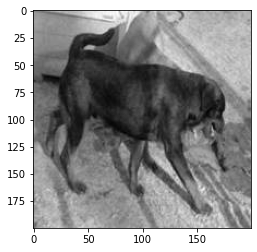

In [87]:
input_image=X_test[0:1,:,:,:]
plt.imshow(input_image[0,:,:,0], cmap = 'gray')

In [82]:
y_pred[0]

0

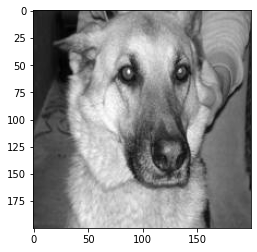

In [88]:
input_image=X_test[1:2,:,:,:]
plt.imshow(input_image[0,:,:,0], cmap = 'gray')

In [89]:
y_pred[1]

1

## CNN with ImageGenerator

In [1]:
import zipfile
import pandas as pd
import seaborn as sns
import missingno as msno
from keras.preprocessing.image import (ImageDataGenerator, 
                                       img_to_array, 
                                       array_to_img, 
                                       load_img)

from tensorflow.keras.applications import ResNet50
from keras import optimizers
from keras import regularizers
from keras.callbacks import EarlyStopping,LearningRateScheduler
import tensorflow
from keras import backend as K
K.clear_session()

from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from tensorflow.keras.utils import plot_model

In [4]:
zip_files = glob.glob('/Users/yutongwang/Desktop/dogs-vs-cats/*.zip')

In [5]:
for file in zip_files:
    with zipfile.ZipFile(file, 'r') as Z:
        Z.extractall('data')

In [13]:
train_dir = '/Users/yutongwang/Desktop/Image_classification/dogs-vs-cats/cat_dog/'
test_dir  = '/Users/yutongwang/Desktop/Image_classification/dogs-vs-cats/test1/'

In [14]:
def category(path): 
    return [file.split('.')[0] for file in os.listdir(path)]

def filename(path):
    return [file for file in os.listdir(path)]

# image names and labels
x_train_imgname = filename(train_dir) 
x_test_imgname = filename(test_dir)
y_train_label = category(train_dir)

train_image_df = pd.DataFrame({ 'filename': x_train_imgname, 'category': y_train_label})
test_image_df = pd.DataFrame({'filename': x_test_imgname})

In [15]:
def img_path(directory):
    ''' 
    This function extracts image ids, category,and image paths from directory.
    input:
    directiory: Path to location of images
    Return:
    ID_no: list of image ids
    Paths: list of image paths
    cate: list of category
    '''
    paths = []
    cate = []
    ID_no = []
    for file in os.listdir(directory):
        path = os.path.join(directory, file)
        paths.append(path)
        cate.append(file.split('.')[0])
        ID_no.append(file.split('.')[1])
    return ID_no, paths, cate




def showImages(data,num_row  = 3,num_col =  3, name = 'any', subtitle = 'off'):
    """ This function creates a grid of images from  dataset.
    Shuffled images will be displayed.
    
    Input: 
    num_row: default: 3, no. of rows in a grid
    num_col: default:3, no. of columns in grid
    data: Dataframe of paths 
    name:  default 'any', takes: cat, dog, any or something else would give both
    subtitle: display id number for each image, defalult: 'off', takes: 'on' and 'off'
    Return: None
    
    """
    
    # little data sorting
    cat_df,dog_df = data[data['Category'] == 'cat'], data[data['Category'] == 'dog']

    
    if name == 'dog':
        X, Y  = dog_df['img_paths'], dog_df['ID_no']
    elif name == 'cat':
        X, Y  = cat_df['img_paths'], cat_df['ID_no']     
    else:
        X, Y  = data['img_paths'], data['ID_no']     # could use try and except but lets stick to minimal code

    (X_rand, Y_rand) = shuffle(X, Y)
    
    # showing images on matplotlib 
    
    fig, ax = plt.subplots(num_row,num_col,figsize = (12,12), dpi = 100)
    fig.patch.set_facecolor('#f5f6f6')
    axes = ax.ravel()
    
    for idx,ax  in enumerate(axes):
        x = load_img(X_rand.iloc[idx],target_size= (125, 125))
        ax.imshow(x)
        if subtitle == 'on':
            ax.set_title("{}".format(Y_rand.iloc[idx]))
        else:
            ax.set_title('')
        ax.axis('off')
        plt.subplots_adjust(wspace =0)
        del x
    #fig.tight_layout()
    
    fig.text(0.1,0.93, '{}s from Training Data'.format(name.capitalize()),{'fontfamily':'serif','size':18,'weight':'bold'})
    
    return None

In [16]:
# Implementing above function over train data set
ID_no, img_paths, train_images = img_path(train_dir)

visual_df = pd.DataFrame({'ID_no':ID_no,'Category':train_images, 'img_paths': img_paths})

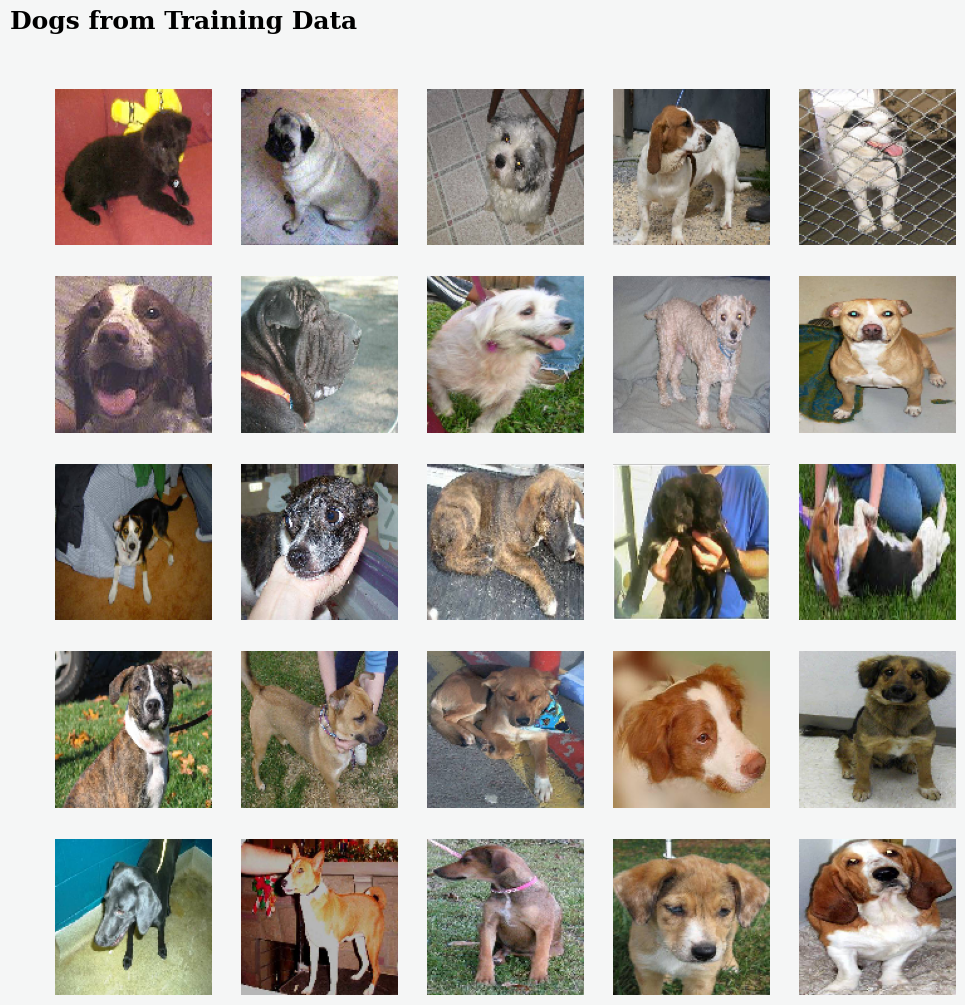

In [18]:
showImages(visual_df,5,5, name = 'dog')
# , sutestbtitle = 'off'

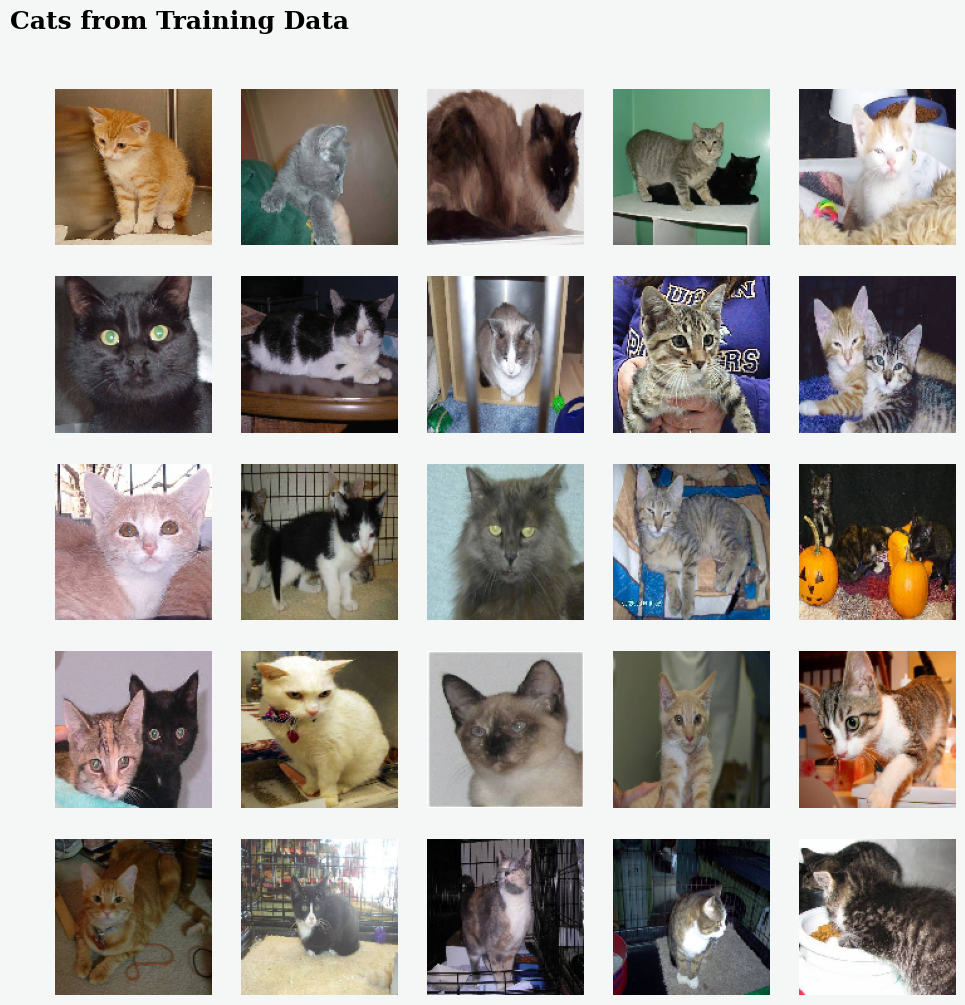

In [19]:
showImages(visual_df,5,5, name = 'cat', subtitle = 'off')

In [20]:
train_valid_df, test_df = train_test_split(train_image_df, test_size = 0.04)
train_df, valid_df = train_test_split(train_valid_df, test_size = 0.2)

train_images = train_df.shape[0]
valid_images = valid_df.shape[0]
holdon_images = test_df.shape[0]
test_images = test_image_df.shape[0]

In [21]:
img_size = 224
batch_size = 128

# dataframe iterators without data agumnetation
train_map = ImageDataGenerator()
valid_map = ImageDataGenerator()
test_map =  ImageDataGenerator()

#Creatinga a dataframe iterators for fitting
vani_train_data = train_map.flow_from_dataframe(
            train_df,train_dir,
            x_col = 'filename',
            y_col = 'category',
            target_size = (img_size, img_size),
            batch_size = batch_size,
            class_mode = 'categorical')

vani_valid_data = valid_map.flow_from_dataframe(
             valid_df, train_dir,
             x_col = 'filename',
             y_col = 'category',
             target_size = (img_size, img_size),
             batch_size = batch_size,
             class_mode = 'categorical')


vani_test_data = test_map.flow_from_dataframe(
             test_df, train_dir,
             x_col = 'filename',
             y_col = None,
             target_size = (img_size, img_size),
             batch_size = batch_size,
             class_mode = None,
             shuffle = False)

Found 1536 validated image filenames belonging to 2 classes.
Found 383 validated image filenames belonging to 2 classes.
Found 81 validated image filenames.


/Users/yutongwang/opt/anaconda3/envs/tensorflow/lib/python3.6/site-packages/keras_preprocessing/image/dataframe_iterator.py:282: UserWarning: Found 1 invalid image filename(s) in x_col="filename". These filename(s) will be ignored.
  .format(n_invalid, x_col)


In [22]:
#Building model computational graph
vani_model = Sequential()
vani_model.add(Convolution2D(16, (3,3), activation = 'relu', padding = 'same', input_shape = (224,224,3)))
vani_model.add(Convolution2D(16, (3,3), activation = 'relu', padding = 'same'))
vani_model.add(MaxPooling2D(pool_size = (2,2), strides=(2,2)))

vani_model.add(Convolution2D(32, (3,3), activation = 'relu', padding = 'same'))
vani_model.add(Convolution2D(32, (3,3), activation = 'relu', padding = 'same'))
vani_model.add(MaxPooling2D(pool_size = (2,2), strides=(2,2)))

vani_model.add(Convolution2D(64, (3,3), activation = 'relu', padding = 'same'))
vani_model.add(Convolution2D(64, (3,3), activation = 'relu', padding = 'same'))
vani_model.add(MaxPooling2D(pool_size = (2,2),strides=(2,2)))

vani_model.add(Convolution2D(128, (3,3), activation = 'relu', padding = 'same'))
vani_model.add(Convolution2D(128, (3,3), activation = 'relu', padding = 'same'))
vani_model.add(MaxPooling2D(pool_size = (2,2),strides=(2,2)))

vani_model.add(Dropout(0.3))

vani_model.add(Convolution2D(256, (3,3), activation = 'relu', padding = 'same'))
vani_model.add(Convolution2D(256, (3,3), activation = 'relu', padding = 'same'))
vani_model.add(MaxPooling2D(pool_size = (2,2),strides=(2,2)))

vani_model.add(Dropout(0.3))

vani_model.add(Flatten())

vani_model.add(Dense(512, activation = 'relu'))

vani_model.add(Dropout(0.5))

vani_model.add(Dense(2, activation = 'softmax'))

vani_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 16)      448       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 16)      2320      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 32)      4640      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 56, 56, 64)        1

In [124]:
#compiling model with loss, opt, metrics
loss = 'categorical_crossentropy'
opt = tf.keras.optimizers.Adam(learning_rate= 0.0001,beta_1=0.9, beta_2=0.999,epsilon=1e-07)
metrics = ['accuracy']

vani_model.compile(loss = loss, optimizer = opt, metrics = metrics)

# fitting the model for training dataset
vani_history = vani_model.fit(vani_train_data, epochs = 30,
                          validation_data = vani_valid_data,
                          validation_steps= valid_images//batch_size,
                          steps_per_epoch= train_images//batch_size)

Epoch 1/30
12/12 [==============================] - 67s 6s/step - loss: 0.6800 - accuracy: 0.5831 - val_loss: 0.6787 - val_accuracy: 0.5312
Epoch 2/30
12/12 [==============================] - 66s 6s/step - loss: 0.6460 - accuracy: 0.6156 - val_loss: 0.6487 - val_accuracy: 0.6172
Epoch 3/30
12/12 [==============================] - 65s 5s/step - loss: 0.6224 - accuracy: 0.6482 - val_loss: 0.6077 - val_accuracy: 0.6641
Epoch 4/30
12/12 [==============================] - 65s 5s/step - loss: 0.6086 - accuracy: 0.6691 - val_loss: 0.5958 - val_accuracy: 0.6797
Epoch 5/30
12/12 [==============================] - 66s 6s/step - loss: 0.6001 - accuracy: 0.6730 - val_loss: 0.6166 - val_accuracy: 0.6354
Epoch 6/30
12/12 [==============================] - 67s 6s/step - loss: 0.5780 - accuracy: 0.6762 - val_loss: 0.5911 - val_accuracy: 0.6615
Epoch 7/30
12/12 [==============================] - 68s 6s/step - loss: 0.5369 - accuracy: 0.7212 - val_loss: 0.5747 - val_accuracy: 0.7083
Epoch 8/30
12/12 [==

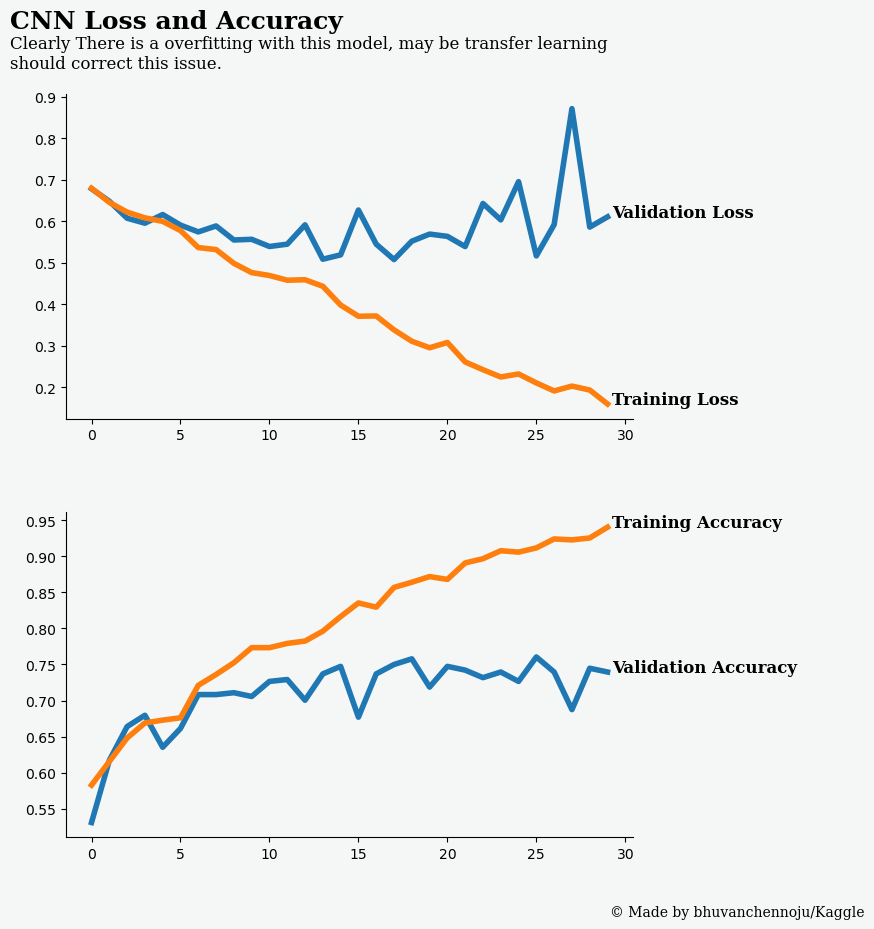

In [131]:
fig,ax  = plt.subplots(2,1, figsize =(8,8), dpi = 100)
fig.patch.set_facecolor('#f5f6f6')

axes  = ax.ravel()

for ax in axes:
    ax.set_facecolor('#f5f6f6')
    for loc in ['right','top',]:
        ax.spines[loc].set_visible(False)
        
hist1 = vani_history.history
Epochs =  range(len(hist1['loss']))

## loss plot
sns.lineplot(x = Epochs, y = hist1['val_loss'],  ax = axes[0], linewidth = 4)
sns.lineplot(x = Epochs, y = hist1['loss'], ax  = axes[0], linewidth =4)


axes[0].text(Epochs[-1]+0.25,hist1['val_loss'][-1],'Validation Loss',{'fontfamily':'serif', 'size':12, 'weight':'bold'})
axes[0].text(Epochs[-1]+0.25,hist1['loss'][-1] ,'Training Loss',{'fontfamily':'serif', 'size':12, 'weight':'bold'})

# accuracy plot
sns.lineplot(x = Epochs, y = hist1['val_accuracy'],ax = axes[1],linewidth = 4)
sns.lineplot(x = Epochs, y = hist1['accuracy'],ax = axes[1],linewidth =4)
axes[1].text(Epochs[-1]+0.25,hist1['val_accuracy'][-1],'Validation Accuracy',{'fontfamily':'serif', 'size':12, 'weight':'bold'})
axes[1].text(Epochs[-1]+0.25,hist1['accuracy'][-1] ,'Training Accuracy',{'fontfamily':'serif', 'size':12, 'weight':'bold'})


fig.text(0,1.06, 'CNN Loss and Accuracy ',{'fontfamily':'serif', 'size':18, 'weight':'bold'})
fig.text(0,1.01, '''Clearly There is a overfitting with this model, may be transfer learning
should correct this issue.''',{'fontfamily':'serif', 'size':12})
        
fig.text(0.75,-0.05,'© Made by bhuvanchennoju/Kaggle',{'fontfamily':'serif', 'size':10,  'color':'black'})
plt.tight_layout(h_pad = 5)

In [132]:
vani_pred = vani_model.predict_generator(vani_test_data)
test_df['vani_pred'] = np.argmax(vani_pred, axis = -1)
labels = dict((v,k) for k,v in vani_train_data.class_indices.items())

test_df['vani_pred'] = test_df['vani_pred'].map(labels)

/Users/yutongwang/opt/anaconda3/envs/tensorflow/lib/python3.6/site-packages/keras/engine/training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '
/Users/yutongwang/opt/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/yutongwang/opt/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

In [133]:
confusion_matrix(test_df['category'],test_df['vani_pred'])

array([[30, 14],
       [ 7, 30]])

In [134]:
print(classification_report(test_df['vani_pred'], test_df['category'],target_names=target_names))

               precision    recall  f1-score   support

class 0 (cat)       0.68      0.81      0.74        37
class 1 (dog)       0.81      0.68      0.74        44

     accuracy                           0.74        81
    macro avg       0.75      0.75      0.74        81
 weighted avg       0.75      0.74      0.74        81



## ResNet50 Model

In [140]:
train_aug_map = ImageDataGenerator(
                    rotation_range=10,
                    #zoom_range=0.1,
                    horizontal_flip=True,
                    fill_mode='nearest',
                    #width_shift_range=0.1,
                    #height_shift_range=0.1,
                    preprocessing_function = tensorflow.keras.applications.resnet50.preprocess_input)
res_train_data = train_aug_map.flow_from_dataframe(
            train_df, train_dir,
            x_col = 'filename',
            y_col = 'category',
            target_size = (img_size, img_size),
            batch_size = batch_size,
            class_mode = 'categorical')

Found 1535 validated image filenames belonging to 2 classes.


/Users/yutongwang/opt/anaconda3/envs/tensorflow/lib/python3.6/site-packages/keras_preprocessing/image/dataframe_iterator.py:282: UserWarning: Found 1 invalid image filename(s) in x_col="filename". These filename(s) will be ignored.
  .format(n_invalid, x_col)


In [142]:
valid_aug_map = ImageDataGenerator(preprocessing_function = tensorflow.keras.applications.resnet50.preprocess_input)

res_valid_data = valid_aug_map.flow_from_dataframe(
             valid_df, train_dir,
             x_col = 'filename',
             y_col = 'category',
             target_size = (img_size, img_size),
             batch_size = batch_size,
             class_mode = 'categorical')

test_aug_map = ImageDataGenerator(preprocessing_function = tensorflow.keras.applications.resnet50.preprocess_input)

res_test_data = test_aug_map.flow_from_dataframe(
             test_df, train_dir,
             x_col = 'filename',
             y_col = None,
             class_mode = None,
             target_size = (img_size, img_size),
             shuffle = False)

Found 384 validated image filenames belonging to 2 classes.
Found 81 validated image filenames.


In [144]:
epoch = 50
learning_rate = 3e-5 
lr_start = 0.00000001
lr_min = 0.000001
lr_max = 3e-5 
lr_rampup_epochs = 1
lr_sustain_epochs = 1
lr_exp_decay = .8

def lrfn(epoch):
    if epoch < lr_rampup_epochs:
        lr = (lr_max - lr_start) / lr_rampup_epochs * epoch + lr_start
    elif epoch < lr_rampup_epochs + lr_sustain_epochs:
        lr = lr_max
    else:
        lr = (lr_max - lr_min) * lr_exp_decay**(epoch - lr_rampup_epochs - lr_sustain_epochs) + lr_min
    return lr

In [146]:
#loading resent 
resNet = tensorflow.keras.applications.ResNet50(weights = 'imagenet',
                        include_top = False,
                        input_shape = (224,224, 3))

resNet.trainable = False # Freeze layers
resNet_model = Sequential([
        resNet,
        Flatten(),
        Dense(1024, activation = 'relu'),
        Dropout(0.4),
        Dense(2, activation = 'softmax')])
     

optimizer = tensorflow.keras.optimizers.Adam(1e-5)

In [147]:
earlystop = EarlyStopping(patience= 5)
    
lr_callback = LearningRateScheduler(lrfn, verbose = True)

callbacks = [earlystop, lr_callback]

In [149]:
resNet_model.compile(optimizer = optimizer,
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])
resnet_history = resNet_model.fit_generator(res_train_data, epochs = 15,
                          validation_data = res_valid_data,
                          validation_steps= valid_images//batch_size,
                          steps_per_epoch= train_images//batch_size,
                          callbacks = callbacks)

Epoch 1/15

Epoch 00001: LearningRateScheduler setting learning rate to 1e-08.
12/12 [==============================] - 101s 8s/step - loss: 0.0044 - accuracy: 0.9980 - val_loss: 0.3293 - val_accuracy: 0.9661
Epoch 2/15

Epoch 00002: LearningRateScheduler setting learning rate to 3e-05.
12/12 [==============================] - 95s 8s/step - loss: 0.0021 - accuracy: 0.9987 - val_loss: 0.3410 - val_accuracy: 0.9635
Epoch 3/15

Epoch 00003: LearningRateScheduler setting learning rate to 3e-05.
12/12 [==============================] - 96s 8s/step - loss: 0.0088 - accuracy: 0.9987 - val_loss: 0.3282 - val_accuracy: 0.9635
Epoch 4/15

Epoch 00004: LearningRateScheduler setting learning rate to 2.4200000000000002e-05.
12/12 [==============================] - 97s 8s/step - loss: 5.8851e-04 - accuracy: 1.0000 - val_loss: 0.3278 - val_accuracy: 0.9661
Epoch 5/15

Epoch 00005: LearningRateScheduler setting learning rate to 1.9560000000000006e-05.
12/12 [==============================] - 97s 8s/st

/Users/yutongwang/opt/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:37: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


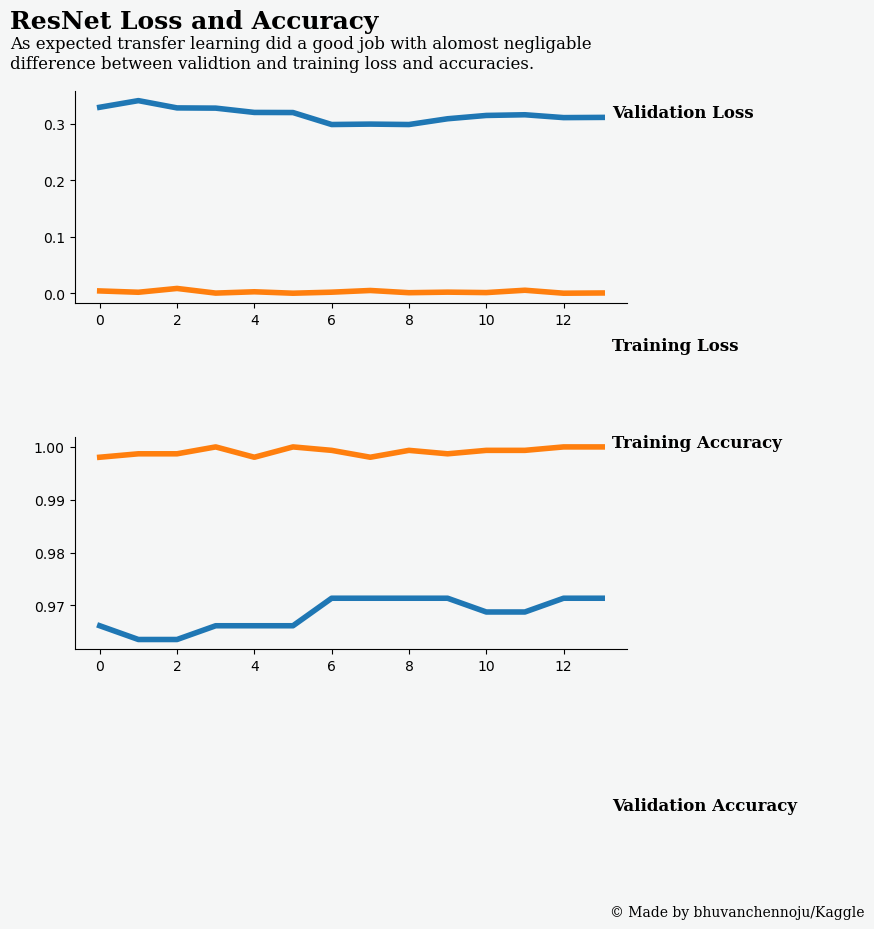

In [164]:
fig,ax  = plt.subplots(2,1, figsize =(8,8), dpi = 100)
fig.patch.set_facecolor('#f5f6f6')

axes  = ax.ravel()

for ax in axes:
    ax.set_facecolor('#f5f6f6')
    for loc in ['right','top',]:
        ax.spines[loc].set_visible(False)
        
hist2 = resnet_history.history
Epochs =  range(len(hist2['loss']))

## loss plot
sns.lineplot(x = Epochs, y = hist2['val_loss'],  ax = axes[0], linewidth = 4)
sns.lineplot(x = Epochs, y = hist2['loss'], ax  = axes[0], linewidth =4)


axes[0].text(Epochs[-1]+0.25,hist2['val_loss'][-1],'Validation Loss',{'fontfamily':'serif', 'size':12, 'weight':'bold'})
axes[0].text(Epochs[-1]+0.25,hist2['loss'][-1]-0.1 ,'Training Loss',{'fontfamily':'serif', 'size':12, 'weight':'bold'})


# accuracy plot
sns.lineplot(x = Epochs, y = hist2['val_accuracy'],ax = axes[1],linewidth = 4)
sns.lineplot(x = Epochs, y = hist2['accuracy'],ax = axes[1],linewidth =4)
axes[1].text(Epochs[-1]+0.25,hist2['val_accuracy'][-1]-0.04,'Validation Accuracy',{'fontfamily':'serif', 'size':12, 'weight':'bold'})
axes[1].text(Epochs[-1]+0.25,hist2['accuracy'][-1] ,'Training Accuracy',{'fontfamily':'serif', 'size':12, 'weight':'bold'})


fig.text(0,1.06, 'ResNet Loss and Accuracy ',{'fontfamily':'serif', 'size':18, 'weight':'bold'})
fig.text(0,1.01, '''As expected transfer learning did a good job with alomost negligable
difference between validtion and training loss and accuracies.''',{'fontfamily':'serif', 'size':12})
fig.text(0.75,-0.05,'© Made by bhuvanchennoju/Kaggle',{'fontfamily':'serif', 'size':10,  'color':'black'})
        
plt.tight_layout(h_pad = 5)

fig.show()

In [151]:
res_pred = resNet_model.predict_generator(res_test_data)
test_df['res_pred'] = np.argmax(res_pred, axis = -1)
labels = dict((v,k) for k,v in res_train_data.class_indices.items())

test_df['res_pred'] = test_df['res_pred'].map(labels)

/Users/yutongwang/opt/anaconda3/envs/tensorflow/lib/python3.6/site-packages/keras/engine/training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '
/Users/yutongwang/opt/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/yutongwang/opt/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

In [152]:
print(classification_report(test_df['res_pred'], test_df['category'],target_names=target_names))

               precision    recall  f1-score   support

class 0 (cat)       0.93      1.00      0.96        41
class 1 (dog)       1.00      0.93      0.96        40

     accuracy                           0.96        81
    macro avg       0.97      0.96      0.96        81
 weighted avg       0.97      0.96      0.96        81



In [161]:
vani_sub_aug_map = ImageDataGenerator()
res_sub_aug_map = ImageDataGenerator(preprocessing_function = tensorflow.keras.applications.resnet50.preprocess_input)

vani_sub_data = vani_sub_aug_map.flow_from_dataframe(
             test_image_df, test_dir,
             x_col = 'filename',
             y_col = None,
             class_mode = None,
             target_size = (img_size, img_size),
             shuffle = False)


res_sub_data = res_sub_aug_map.flow_from_dataframe(
             test_image_df, test_dir,
             x_col = 'filename',
             y_col = None,
             class_mode = None,
             target_size = (img_size, img_size),
             shuffle = False)

Found 12500 validated image filenames.
Found 12500 validated image filenames.


In [162]:
vani_pred_sub = vani_model.predict_generator(vani_sub_data)
test_image_df['vani_pred_sub'] = np.argmax(vani_pred_sub, axis = -1)
labels = dict((v,k) for k,v in res_train_data.class_indices.items())
test_image_df['vani_pred_sub'] = test_image_df['vani_pred_sub'].map(labels)


res_pred_sub = resNet_model.predict_generator(res_sub_data)
test_image_df['res_pred_sub'] = np.argmax(res_pred_sub, axis = -1)
labels = dict((v,k) for k,v in res_train_data.class_indices.items())
test_image_df['res_pred_sub'] = test_image_df['res_pred_sub'].map(labels)

/Users/yutongwang/opt/anaconda3/envs/tensorflow/lib/python3.6/site-packages/keras/engine/training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


/Users/yutongwang/opt/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:22: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


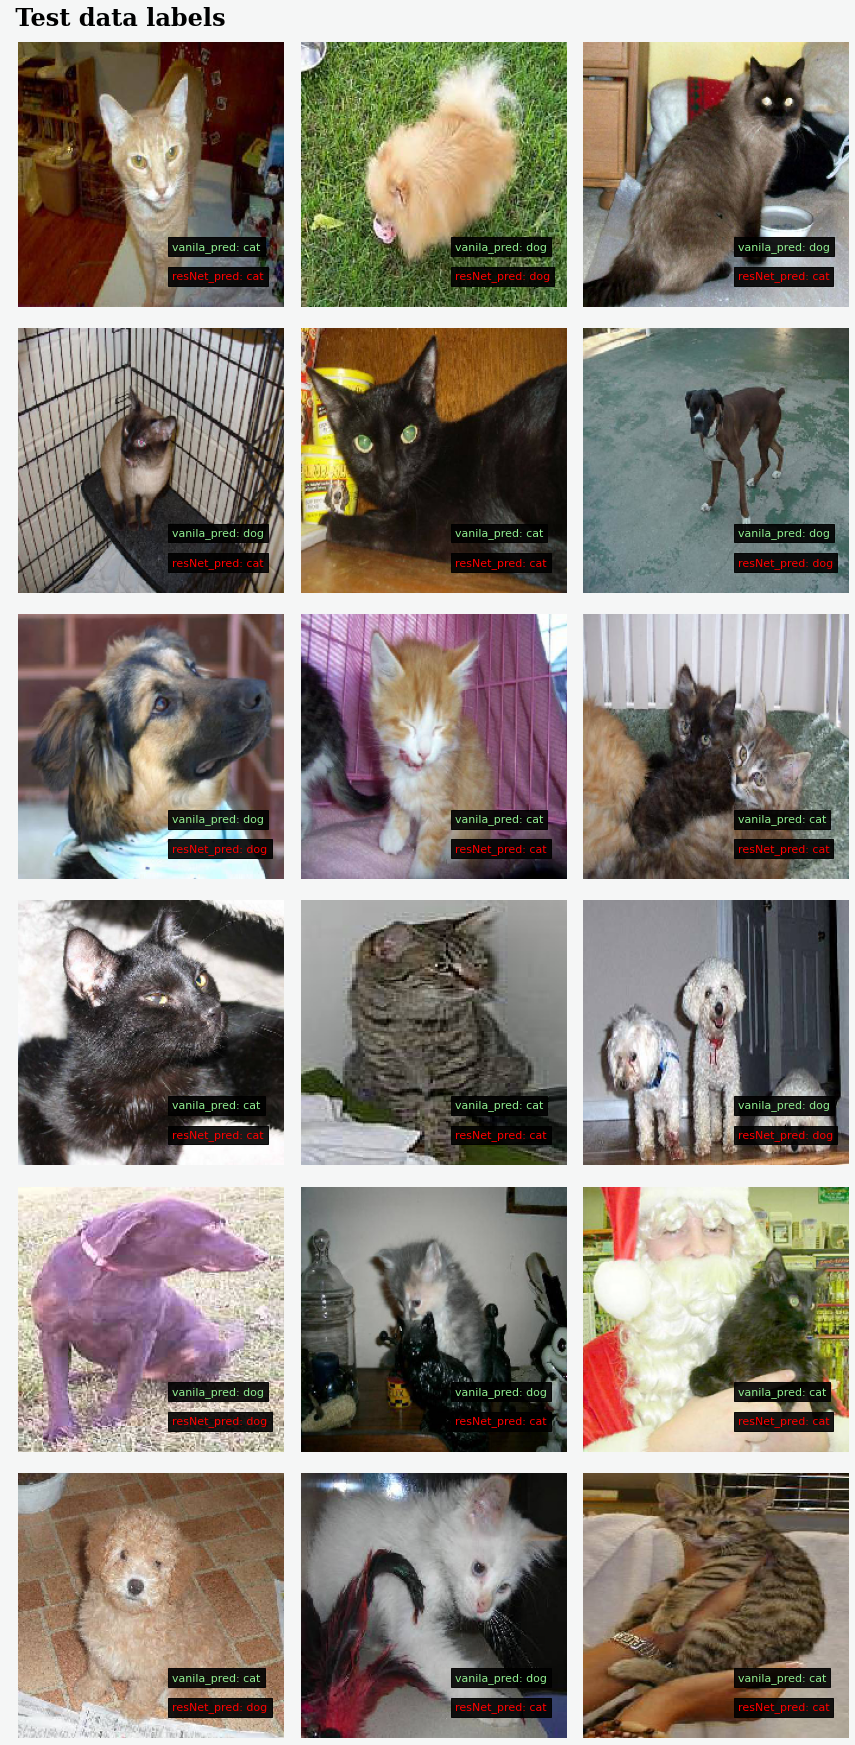

In [163]:
pred_sample = test_image_df.sample(18)
pred_sample.reset_index(drop = True, inplace = True)

fig = plt.figure(figsize=(12,24))
fig.patch.set_facecolor('#f5f6f6')

for index, row in pred_sample.iterrows():
    filename = row['filename']
    vani_pred = row['vani_pred_sub']
    res_pred = row['res_pred_sub']
    img = load_img( test_dir + filename, target_size= (img_size, img_size))
    plt.subplot(6,3, index+1)
    plt.imshow(img)
    plt.gca().axis('off')
    plt.text(130, 175, 'vanila_pred: {}'.format(vani_pred), color='lightgreen',fontsize= 11, bbox=dict(facecolor='black', alpha=0.9))
    plt.text(130, 200, 'resNet_pred: {}'.format(res_pred), color='red',fontsize= 11, bbox=dict(facecolor='black', alpha=0.9))
    
    del img
plt.tight_layout()

fig.text(0,1, ' Test data labels',{'fontfamily':'serif','size':24,'weight':'bold'})
fig.show()